# 02 - PCA Analysis & Dimensionality Reduction
## Heart Disease UCI Dataset

### Objectives:
- Apply Principal Component Analysis (PCA) to reduce dimensionality
- Determine optimal number of components using explained variance
- Visualize PCA results in 2D and 3D space
- Analyze feature contributions to principal components
- Compare original vs PCA-transformed feature space

## 1. Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print(" Libraries imported successfully!")

 Libraries imported successfully!


## 2. Load Preprocessed Data

In [24]:
# Load the preprocessed data from previous step
try:
    X_train = pd.read_csv('../data/X_train.csv')
    X_test = pd.read_csv('../data/X_test.csv')
    y_train = pd.read_csv('../data/y_train.csv').squeeze()
    y_test = pd.read_csv('../data/y_test.csv').squeeze()
    
    print(" Preprocessed data loaded successfully!")
    print(f"   Training set: {X_train.shape}")
    print(f"   Testing set: {X_test.shape}")
    print(f"   Features: {X_train.columns.tolist()}")
    
except FileNotFoundError:
    print(" Preprocessed data not found!")
    print("   Please run 01_data_preprocessing.ipynb first.")
    
# Display first few rows of training data
print("\nFirst 5 rows of training data:")
X_train.head()

 Preprocessed data loaded successfully!
   Training set: (736, 13)
   Testing set: (184, 13)
   Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

First 5 rows of training data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.054235,0.516931,-1.343418,-0.650479,-1.834346,-0.420084,-0.749388,-1.698756,-0.760292,-0.806886,0.295067,-0.3614,-0.586499
1,2.175168,0.516931,-0.268684,-0.108217,-1.834346,-0.420084,-0.749388,0.091821,-0.760292,-0.334061,0.295067,-0.3614,-0.586499
2,-0.054235,0.516931,0.806051,-0.108217,-1.834346,-0.420084,1.735069,-0.107132,1.315283,0.138764,0.295067,-0.3614,1.795748
3,0.901224,0.516931,0.806051,-0.921610,-1.834346,-0.420084,-0.749388,-2.613939,1.315283,-1.279711,0.295067,-0.3614,-0.586499
4,0.901224,0.516931,0.806051,1.410117,-0.274440,-0.420084,0.492841,0.012240,1.315283,-0.806886,0.295067,-0.3614,-0.586499


## 3. Principal Component Analysis (PCA)

In [25]:
print("=== PRINCIPAL COMPONENT ANALYSIS ===\n")

# Note: Data is already scaled from previous step
# If not, we would scale it here

# Initialize PCA without specifying number of components first
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train)

# Calculate explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("PCA completed successfully!")
print(f"Original feature space: {X_train.shape[1]} dimensions")
print(f"PCA feature space: {X_train_pca_full.shape[1]} dimensions")

=== PRINCIPAL COMPONENT ANALYSIS ===

PCA completed successfully!
Original feature space: 13 dimensions
PCA feature space: 13 dimensions


## 4. Determine Optimal Number of Components

=== OPTIMAL COMPONENTS ANALYSIS ===



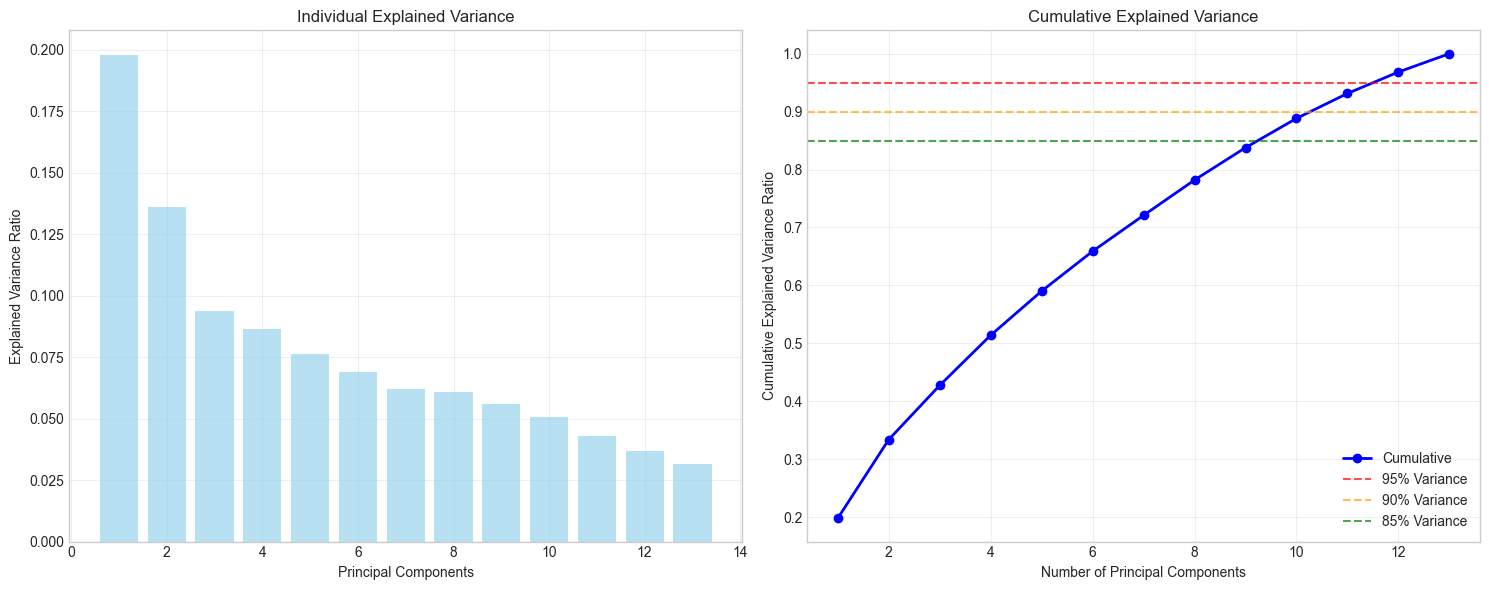

Explained Variance by Component:
  PC1: 0.198 (0.198 cumulative)
  PC2: 0.136 (0.334 cumulative)
  PC3: 0.094 (0.427 cumulative)
  PC4: 0.086 (0.514 cumulative)
  PC5: 0.076 (0.590 cumulative)
  PC6: 0.069 (0.659 cumulative)
  PC7: 0.062 (0.721 cumulative)
  PC8: 0.061 (0.782 cumulative)
  PC9: 0.056 (0.838 cumulative)
  PC10: 0.050 (0.888 cumulative)
  PC11: 0.043 (0.931 cumulative)
  PC12: 0.037 (0.968 cumulative)
  PC13: 0.032 (1.000 cumulative)

Optimal Components Analysis:
  80% variance → 9 components (actual: 0.838)
  85% variance → 10 components (actual: 0.888)
  90% variance → 11 components (actual: 0.931)
  95% variance → 12 components (actual: 0.968)


In [26]:
print("=== OPTIMAL COMPONENTS ANALYSIS ===\n")

# Create visualization for explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Individual explained variance
components = range(1, len(explained_variance) + 1)
ax1.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Individual Explained Variance')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative explained variance
ax2.plot(components, cumulative_variance, 'b-', marker='o', linewidth=2, markersize=6, label='Cumulative')
ax2.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% Variance')
ax2.axhline(y=0.85, color='green', linestyle='--', alpha=0.7, label='85% Variance')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print detailed variance information
print("Explained Variance by Component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"  PC{i+1}: {var:.3f} ({cum_var:.3f} cumulative)")

# Find optimal number of components for different variance thresholds
thresholds = [0.80, 0.85, 0.90, 0.95]
print("\nOptimal Components Analysis:")
for threshold in thresholds:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    print(f"  {threshold*100:.0f}% variance → {n_components} components (actual: {cumulative_variance[n_components-1]:.3f})")

## 5. Apply PCA with Optimal Components

In [27]:
# Choose optimal number of components (95% variance threshold)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Selected {optimal_components} components explaining {cumulative_variance[optimal_components-1]:.3f} variance")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

print(" PCA transformation completed!")
print(f"   Original shape: {X_train.shape}")
print(f"   PCA shape: {X_train_pca.shape}")
print(f"   Variance explained: {pca_optimal.explained_variance_ratio_.sum():.3f}")

# Create DataFrame for PCA results
pca_columns = [f'PC{i+1}' for i in range(optimal_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# Add target variable for visualization
X_train_pca_df['target'] = y_train.values
X_train_pca_df['target_name'] = y_train.map({0: 'No Disease', 1: 'Mild', 2: 'Moderate', 3: 'Serious', 4: 'Severe'})

print("\nFirst 5 rows of PCA-transformed data:")
X_train_pca_df.head()

Selected 12 components explaining 0.968 variance
 PCA transformation completed!
   Original shape: (736, 13)
   PCA shape: (736, 12)
   Variance explained: 0.968

First 5 rows of PCA-transformed data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target,target_name
0,-0.575092,-2.176489,-0.079957,1.343055,-0.435645,-0.968103,-1.085378,-0.682523,0.281349,-0.312901,0.200973,0.873636,3,Serious
1,0.162208,-1.217230,0.024740,1.726532,-1.011105,-0.993687,-0.909862,-0.113620,0.821883,0.516432,-0.237291,-0.577611,0,No Disease
2,1.863766,-0.495530,-1.583341,0.116220,0.399466,0.221488,-1.056736,1.068596,-1.846817,0.498951,0.330215,0.205497,2,Moderate
3,1.518450,-2.976081,-0.330322,0.929354,-1.437836,-0.789111,0.527690,0.019517,-0.240137,-0.804945,0.770108,1.034528,1,Mild
4,1.121987,-0.298313,0.718812,0.431113,-0.731782,0.899441,-0.084895,1.253444,-0.229720,-0.596009,-0.143298,0.475063,1,Mild


## 6. Visualize PCA Results

=== PCA VISUALIZATION ===



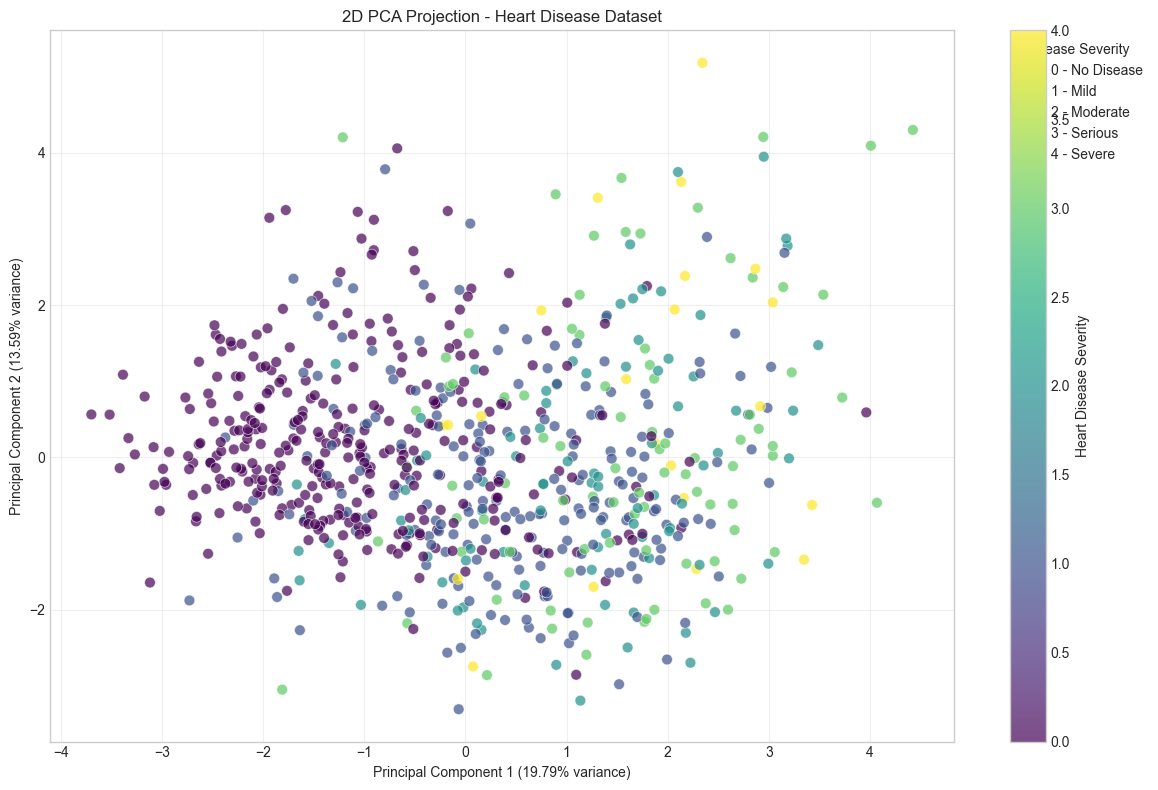

In [28]:
print("=== PCA VISUALIZATION ===\n")

# 6.1 2D Scatter Plot (PC1 vs PC2)
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_train_pca_df['PC1'], X_train_pca_df['PC2'], 
                     c=X_train_pca_df['target'], cmap='viridis', 
                     alpha=0.7, s=60, edgecolor='white', linewidth=0.5)

plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.title('2D PCA Projection - Heart Disease Dataset')
plt.colorbar(scatter, label='Heart Disease Severity')
plt.grid(True, alpha=0.3)

# Add legend for target classes
for target_val in sorted(y_train.unique()):
    plt.scatter([], [], c=[plt.cm.viridis(target_val/4)], 
               label=f'{target_val} - {["No Disease", "Mild", "Moderate", "Serious", "Severe"][target_val]}', 
               alpha=0.7)
plt.legend(title='Disease Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

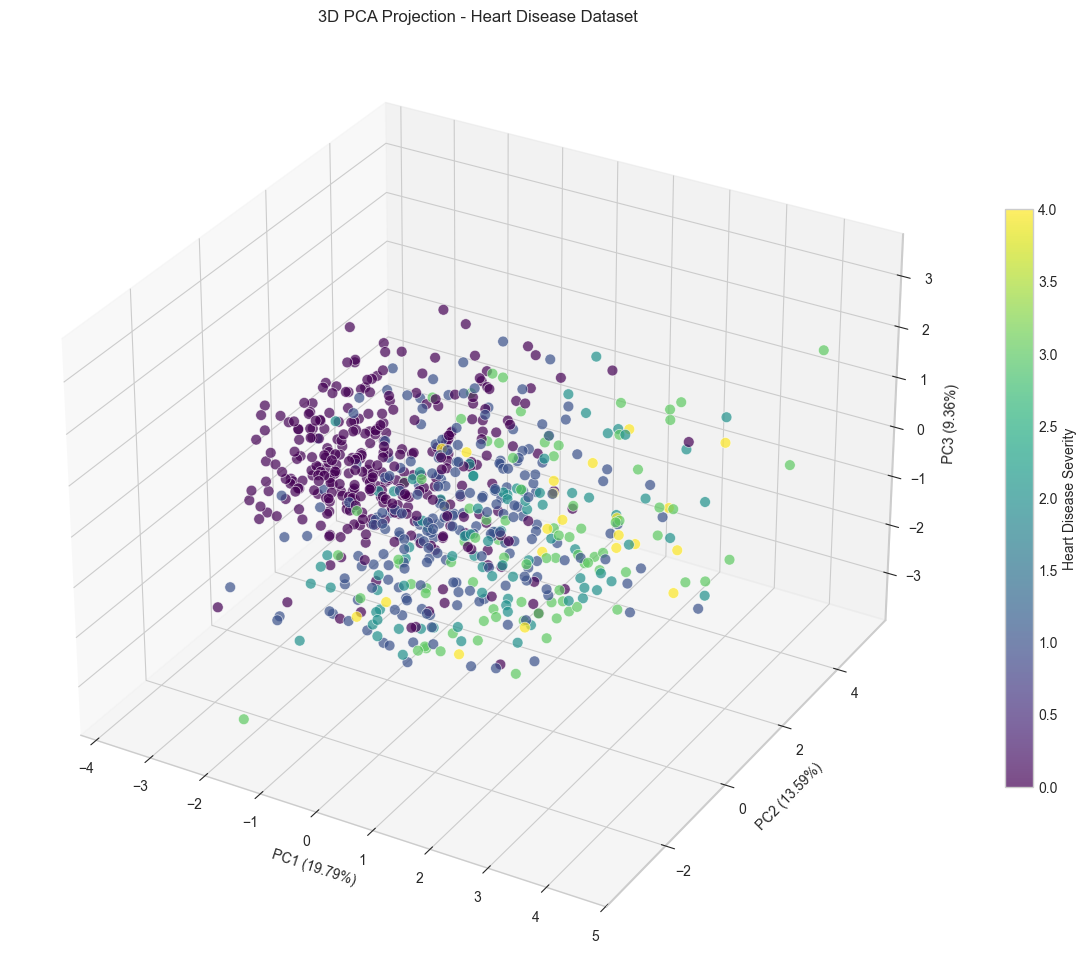

In [29]:
# 6.2 3D Scatter Plot (PC1 vs PC2 vs PC3)
if optimal_components >= 3:
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X_train_pca_df['PC1'], X_train_pca_df['PC2'], X_train_pca_df['PC3'],
                        c=X_train_pca_df['target'], cmap='viridis', 
                        alpha=0.7, s=60, edgecolor='white', linewidth=0.5)
    
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})')
    ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})')
    ax.set_title('3D PCA Projection - Heart Disease Dataset')
    
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=20)
    cbar.set_label('Heart Disease Severity')
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough components for 3D visualization")

Pairplot of first 4 Principal Components:


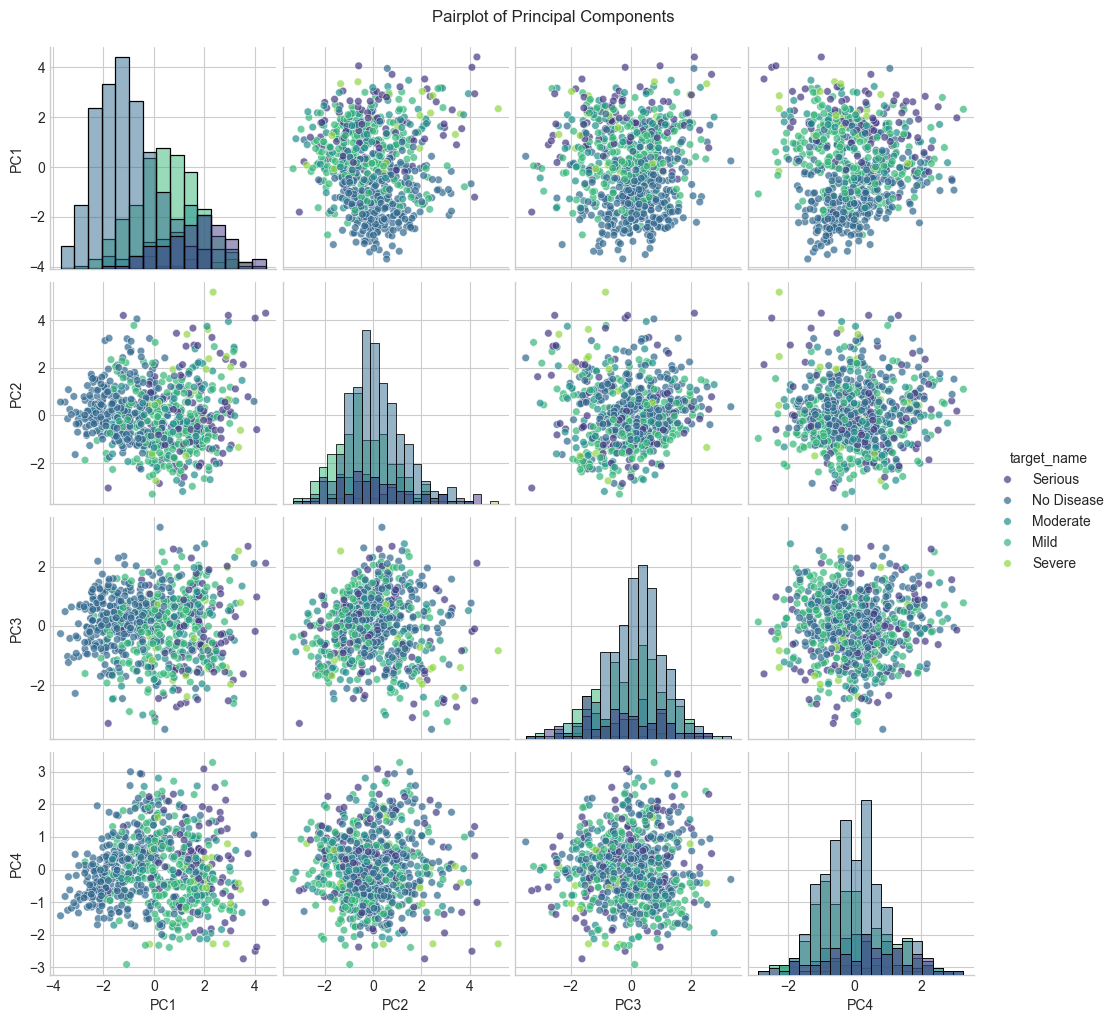

In [30]:
# 6.3 Pairplot of first 4 principal components
if optimal_components >= 4:
    print("Pairplot of first 4 Principal Components:")
    
    #Select first 4 components for pairplot
    pairplot_data = X_train_pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'target_name']]
    
    g = sns.pairplot(pairplot_data, hue='target_name', palette='viridis', 
                    diag_kind='hist', plot_kws={'alpha': 0.7, 's': 30})
    g.fig.suptitle('Pairplot of Principal Components', y=1.02)
    plt.show()
else:
    print("Not enough components for pairplot")

## 7. Analyze Feature Contributions to Principal Components

In [31]:
print("=== FEATURE CONTRIBUTIONS ANALYSIS ===\n")

# Get PCA components (loadings)
pca_components = pca_optimal.components_

# Create DataFrame for component analysis
components_df = pd.DataFrame(
    pca_components,
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(optimal_components)]
)

print("Principal Components Loadings (Feature Contributions):")
components_df.T.style.background_gradient(cmap='RdBu_r', axis=1, vmin=-1, vmax=1)

=== FEATURE CONTRIBUTIONS ANALYSIS ===

Principal Components Loadings (Feature Contributions):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
age,0.342464,0.174865,0.111251,0.415477,-0.362754,-0.285234,-0.049192,-0.014543,0.246704,0.002475,0.270139,-0.335908
sex,0.201308,-0.251794,-0.301531,0.311354,0.473688,0.321635,-0.109499,0.192313,0.523298,-0.224517,-0.025518,0.039446
cp,0.364578,-0.165539,-0.197945,-0.181041,-0.143415,0.062161,0.540546,0.276349,-0.174342,-0.102893,-0.445184,-0.356660
trestbps,0.198792,0.252981,0.442330,0.156844,-0.231032,0.575389,-0.306117,0.021166,-0.063973,-0.063326,-0.426392,0.087793
chol,-0.090420,0.444552,0.291109,-0.310999,0.205166,0.164231,0.317376,-0.054043,0.228810,-0.495539,0.277493,-0.247920
fbs,0.112037,0.211920,0.189298,0.509838,0.347035,0.011556,0.553434,-0.174808,-0.115497,0.357613,-0.019627,0.156932
restecg,0.108283,0.425378,-0.131042,0.142499,0.164918,-0.220972,-0.199179,0.688202,-0.344954,-0.138723,0.099095,0.084324
thalach,-0.392104,0.306205,-0.123419,-0.146693,0.247934,0.160024,-0.019977,0.144955,0.022237,0.398730,-0.172685,-0.138254
exang,0.411459,-0.096437,0.060868,-0.329478,-0.055084,0.272372,0.145940,0.141466,-0.099577,0.158643,0.468620,0.494625
oldpeak,0.372822,0.130829,0.106895,-0.360813,0.145364,-0.116398,-0.198790,0.070413,0.365408,0.538843,-0.045760,-0.251913


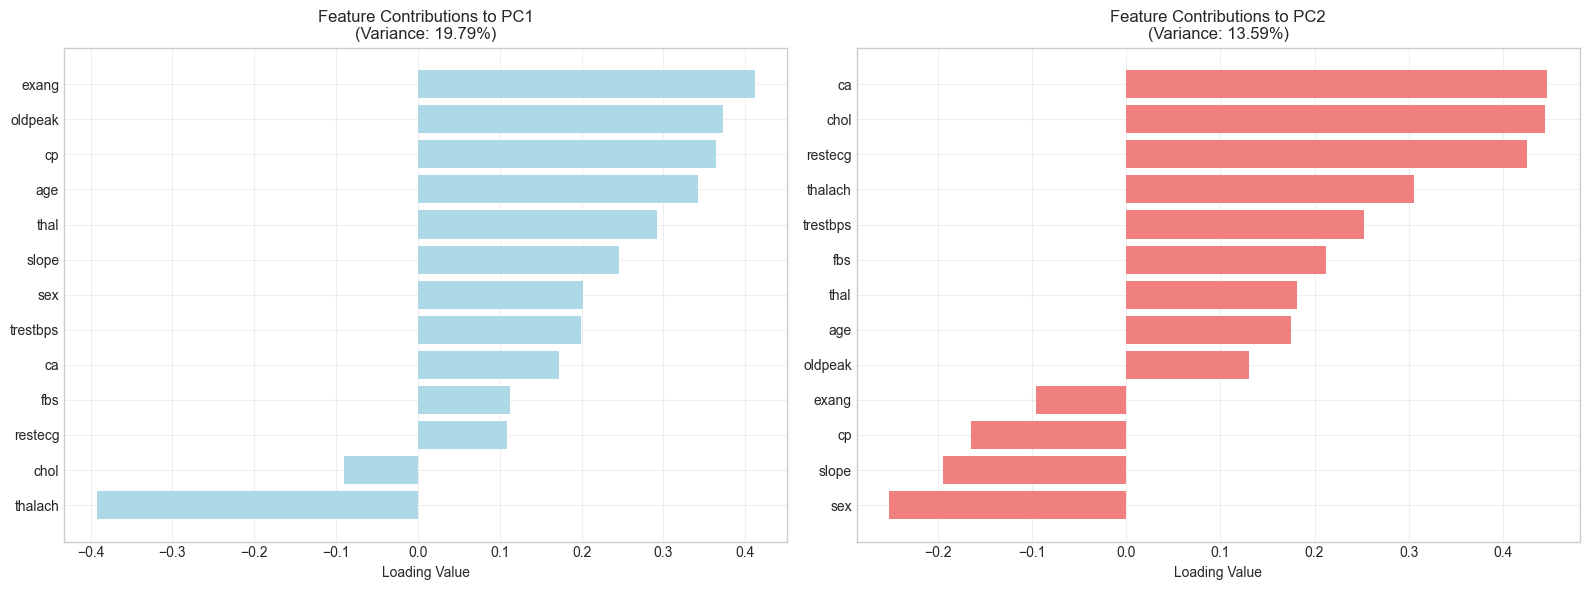

In [32]:
# Visualize feature contributions to first two principal components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for PC1
pc1_loadings = components_df.loc['PC1'].sort_values()
ax1.barh(range(len(pc1_loadings)), pc1_loadings.values, color='lightblue')
ax1.set_yticks(range(len(pc1_loadings)))
ax1.set_yticklabels(pc1_loadings.index)
ax1.set_xlabel('Loading Value')
ax1.set_title(f'Feature Contributions to PC1\n(Variance: {explained_variance[0]:.2%})')
ax1.grid(True, alpha=0.3)

# Plot for PC2
pc2_loadings = components_df.loc['PC2'].sort_values()
ax2.barh(range(len(pc2_loadings)), pc2_loadings.values, color='lightcoral')
ax2.set_yticks(range(len(pc2_loadings)))
ax2.set_yticklabels(pc2_loadings.index)
ax2.set_xlabel('Loading Value')
ax2.set_title(f'Feature Contributions to PC2\n(Variance: {explained_variance[1]:.2%})')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

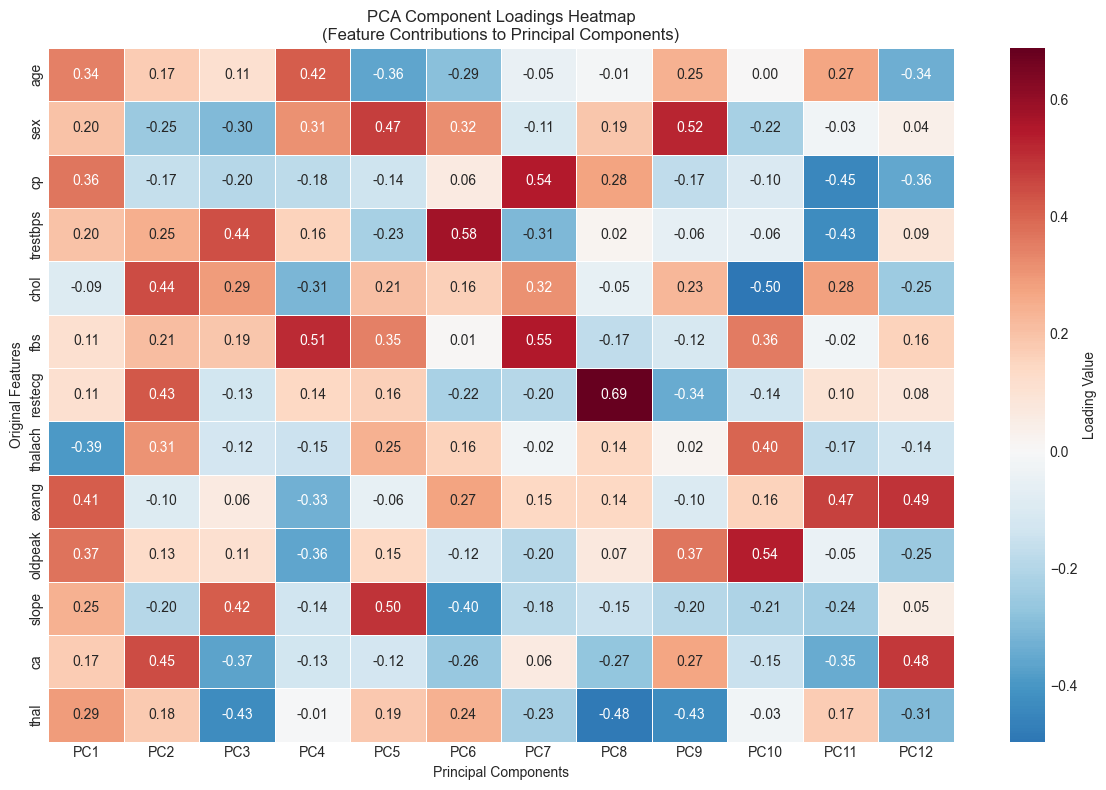

In [33]:
# Create a heatmap of component loadings
plt.figure(figsize=(12, 8))

sns.heatmap(components_df.T, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Loading Value'})
plt.title('PCA Component Loadings Heatmap\n(Feature Contributions to Principal Components)')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.tight_layout()
plt.show()

## 8. Compare Original vs PCA Space

=== ORIGINAL vs PCA SPACE COMPARISON ===

Variance Comparison:
  Original space total variance: 13.0837
  PCA space total variance: 12.6865
  Variance preserved: 96.964%


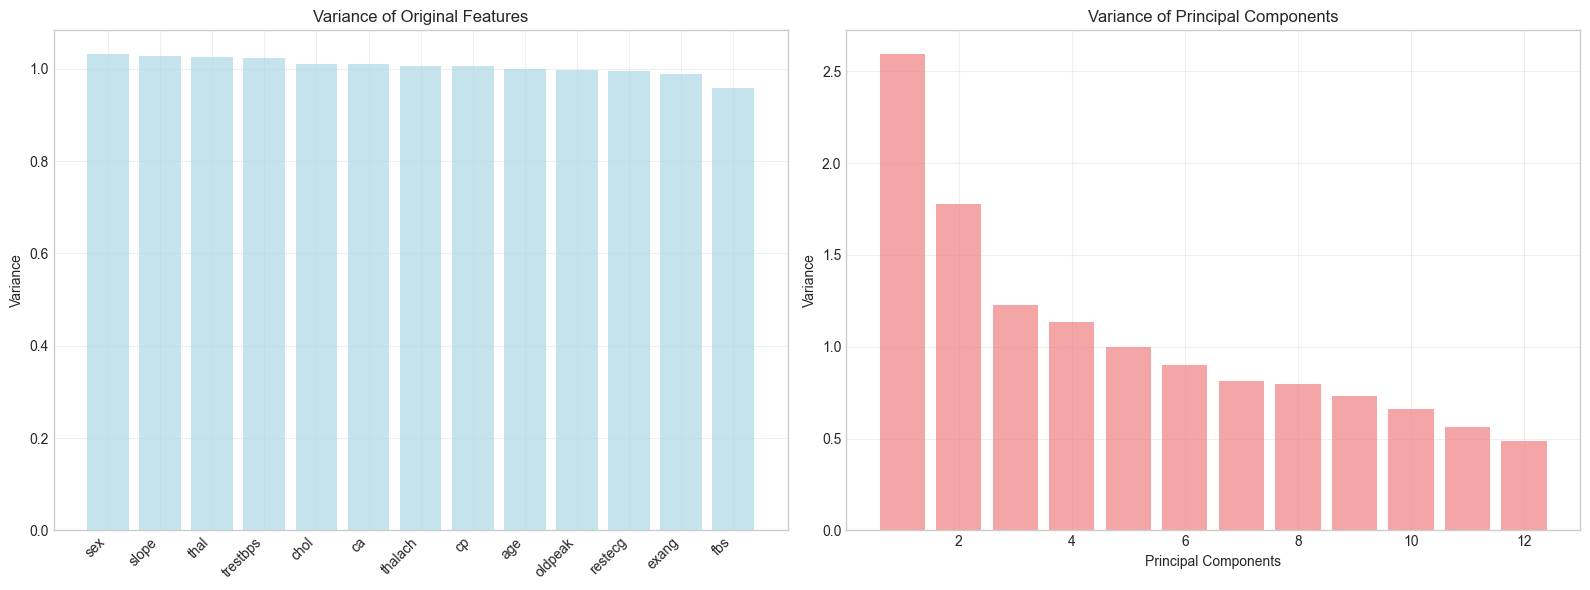

In [34]:
print("=== ORIGINAL vs PCA SPACE COMPARISON ===\n")

# Calculate variance in original space
original_variance = np.var(X_train, axis=0)
total_original_variance = np.sum(original_variance)

# Calculate variance in PCA space
pca_variance = pca_optimal.explained_variance_
total_pca_variance = np.sum(pca_variance)

print("Variance Comparison:")
print(f"  Original space total variance: {total_original_variance:.4f}")
print(f"  PCA space total variance: {total_pca_variance:.4f}")
print(f"  Variance preserved: {total_pca_variance/total_original_variance:.3%}")

# Plot variance distribution comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original feature variances
sorted_original_vars = pd.Series(original_variance, index=X_train.columns).sort_values(ascending=False)
ax1.bar(range(len(sorted_original_vars)), sorted_original_vars.values, color='lightblue', alpha=0.7)
ax1.set_xticks(range(len(sorted_original_vars)))
ax1.set_xticklabels(sorted_original_vars.index, rotation=45, ha='right')
ax1.set_title('Variance of Original Features')
ax1.set_ylabel('Variance')
ax1.grid(True, alpha=0.3)

# PCA component variances
ax2.bar(range(1, len(pca_variance) + 1), pca_variance, color='lightcoral', alpha=0.7)
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Variance')
ax2.set_title('Variance of Principal Components')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Save PCA Results

In [36]:
print("=== SAVING PCA RESULTS ===\n")

# Save PCA-transformed datasets
X_train_pca_df.drop(['target', 'target_name'], axis=1).to_csv('../data/X_train_pca.csv', index=False)
X_test_pca_df.to_csv('../data/X_test_pca.csv', index=False)

# Save PCA model for later use
import joblib
joblib.dump(pca_optimal, '../models/pca_model.pkl')

# Save component analysis
components_df.to_csv('../results/pca_components_analysis.csv')

# Save variance information
variance_info = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained_Variance': explained_variance,
    'Cumulative_Variance': cumulative_variance
})
variance_info.to_csv('../results/pca_variance_info.csv', index=False)

print(" PCA results saved successfully!")
print("   - X_train_pca.csv: PCA-transformed training features")
print("   - X_test_pca.csv: PCA-transformed testing features")
print("   - pca_model.pkl: Trained PCA model")
print("   - pca_components_analysis.csv: Component loadings analysis")
print("   - pca_variance_info.csv: Variance explanation details")

print(f"\n PCA Transformation Summary:")
print(f"   Original dimensions: {X_train.shape[1]}")
print(f"   PCA dimensions: {optimal_components}")
print(f"   Variance preserved: {pca_optimal.explained_variance_ratio_.sum():.3%}")
print(f"   Data compression: {(1 - optimal_components/X_train.shape[1]):.1%}")



=== SAVING PCA RESULTS ===

 PCA results saved successfully!
   - X_train_pca.csv: PCA-transformed training features
   - X_test_pca.csv: PCA-transformed testing features
   - pca_model.pkl: Trained PCA model
   - pca_components_analysis.csv: Component loadings analysis
   - pca_variance_info.csv: Variance explanation details

 PCA Transformation Summary:
   Original dimensions: 13
   PCA dimensions: 12
   Variance preserved: 96.833%
   Data compression: 7.7%
